In [107]:
import pandas as pd
import pickle as pkl
from collections import Counter
import matplotlib.pyplot as plt
from afinn import Afinn
import numpy as np

# Loading preprocessed tweets for different personality disorders as well as normal personality and transforming into pandas dataframe

In [158]:
Anxiety = open('anxiety_new_tweets_clean.txt', 'r')
Depression=open('Depression_tweets_clean.txt','r')
OCD=open('OCD_tweets_clean.txt','r')
General=open('General_tweets_clean.txt','r')
user_tweetstore1 = []
user_tweetstore2 = []
user_tweetstore3 = []
user_tweetstore4 = []
word_Anxiety=[]
word_Depression=[]
word_OCD=[]
word_Normal=[]
user_tweetstorecombo = []
afinn = Afinn()
n=10000
tweet=[]
for line_ocd in OCD:
    newline_ocd=line_ocd.split()
    if len(newline_ocd)!=0 and newline_ocd[0]=='ocd':
        word_OCD+=newline_ocd
        user_tweetstore1.append((' '.join(newline_ocd[1:]),afinn.score(' '.join(newline_ocd[1:])),'ocd'))
user_tweetstorecombo+=user_tweetstore1[:n] 
for line_Depression in Depression:
    newline_Depression=line_Depression.split()
    if len(newline_Depression)!=0 and newline_Depression[0]=='depression':  
        word_Depression+=newline_Depression
        user_tweetstore2.append((' '.join(newline_Depression[1:]),afinn.score(' '.join(newline_Depression[1:])),'depression'))
user_tweetstorecombo+=user_tweetstore2[:n] 

for line_Anxiety in Anxiety:
    newline_Anxiety=line_Anxiety.split()
    #print(newline_Anxiety)
    if len(newline_Anxiety)!=0 and newline_Anxiety[0]=='anxiety':
        word_Anxiety+=newline_Anxiety
        user_tweetstore3.append((' '.join(newline_Anxiety[1:]),afinn.score(' '.join(newline_Anxiety[1:])),'anxiety'))
user_tweetstorecombo+=user_tweetstore3[:n] 

for line_General in General:
    newline_General=line_General.split()
    if len(newline_General)!=0 and newline_General[0]=='general': 
        word_Normal+=newline_General
        user_tweetstore4.append((' '.join(newline_General[1:]),afinn.score(' '.join(newline_General[1:])),'general')) 
user_tweetstorecombo+=user_tweetstore4[:n] 
Disorder_Tweets = pd.DataFrame(user_tweetstorecombo,columns=["Disorder Tweets","Affin_Score","Disorder Category"])
pkl.dump(Disorder_Tweets, open("Disorder_Tweets.pkl", "wb"))
pkl.load(open("Disorder_Tweets.pkl", "rb"))

,Disorder Tweets,Affin_Score,Disorder Category
0,Professional Psychiatric Patients Wanted - App...,-2.0,ocd
1,END MENTAL ILLNESS STIGMA ! #Peanuts #Stigma #...,-2.0,ocd
2,Getting better should help you do what you wan...,5.0,ocd
3,if all the people that have #mentalillness wer...,-6.0,ocd
4,Wish we had #mhGAP trained GPs treating #menta...,0.0,ocd
5,Oliver the OCD transporter driver has been at ...,0.0,ocd
6,"In people with disorder, actions are at odds w...",-2.0,ocd
7,checking my alarms five times to make sure the...,0.0,ocd
8,The most beautiful people we have known are . ...,0.0,ocd
9,Ever wonder how to help employees or coworkers...,-2.0,ocd


# Used Label encoding to convert categorical Afinn score to numerical score

In [116]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
label_enc.fit(Disorder_Tweets["Affin_Score"])
lbl_x=label_enc.transform(Disorder_Tweets["Affin_Score"])



(40000,)
[ <40000x8026 sparse matrix of type '<class 'numpy.float64'>'
	with 270142 stored elements in Compressed Sparse Row format>
 20 20 ..., 19 21 22]
(40000, 8026)


# Converting the data into TFIDF format with filters for stopwords,lowercase and max_df and min_df

In [118]:
#TfIdf
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(stop_words='english',lowercase=True,max_df=0.8,min_df=3)
X = tv.fit_transform(Disorder_Tweets["Disorder Tweets"])
y=Disorder_Tweets["Disorder Category"]        
np.hstack((X,lbl_x))
#print(X.shape)

(40000, 8026)


# Perform 5 fold cross validation using SVM model and display the accuracy

In [154]:
#SVM
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
clf = SVC(C=0.9,kernel="linear")
#performing crossvalidation
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())

0.84105


# Perform 5 fold cross validation using RandomForestClassifier model and display the accuracy

In [155]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(n_jobs=5,n_estimators=150)
#performing crossvalidation
scores = cross_val_score(clf1, X, y, cv=5)
print(scores.mean())  


0.841525


# Perform 5 fold cross validation using Logistic Regression model and display the accuracy

In [146]:
#using logistic regression
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(C=0.9,solver='lbfgs',multi_class='multinomial',n_jobs=5)
#performing crossvalidation
scores = cross_val_score(clf2, X, y, cv=5)
print(scores.mean())

0.834075


# Train and predict using SVM model and display the accuracy as well as the confusion matrix for the classification labels.

0.846363636364


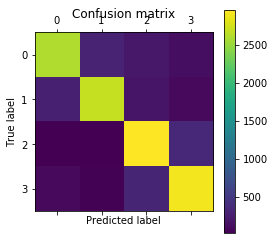

In [147]:
#SVM
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
np.random.seed(3057)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
from sklearn.svm import SVC
clf = SVC(C=0.9,kernel="linear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
conf=confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.matshow(conf1)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification report for SVM model


In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=set(y_test)))

             precision    recall  f1-score   support

    anxiety       0.86      0.80      0.83      3250
        ocd       0.88      0.83      0.85      3258
 depression       0.80      0.90      0.85      3335
    general       0.85      0.86      0.85      3357

avg / total       0.85      0.85      0.85     13200



# Train and predict using LogisticRegression model and display the accuracy as well as the confusion matrix for the classification labels.

0.845151515152


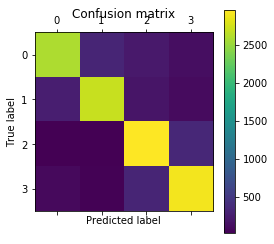

In [149]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
np.random.seed(3057)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(C=0.9,solver='lbfgs',multi_class='multinomial',n_jobs=5)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
print(accuracy_score(y_test, y_pred))
conf1=confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.matshow(conf1)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification report for from LogisticRegression model

In [150]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=set(y_test)))

             precision    recall  f1-score   support

    anxiety       0.87      0.80      0.83      3250
        ocd       0.88      0.83      0.85      3258
 depression       0.80      0.89      0.84      3335
    general       0.84      0.86      0.85      3357

avg / total       0.85      0.85      0.85     13200



# Train and predict using RandomForestClassifier model and display the accuracy as well as the confusion matrix for the classification labels.

0.860833333333


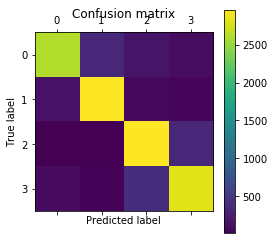

In [156]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
np.random.seed(3057)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(n_jobs=5,n_estimators=150)
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)
print(accuracy_score(y_test, y_pred))
conf2=confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.matshow(conf2)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification report for Random Forest Classifier

In [157]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=set(y_test)))

             precision    recall  f1-score   support

    anxiety       0.91      0.80      0.85      3250
        ocd       0.88      0.91      0.89      3258
 depression       0.82      0.89      0.85      3335
    general       0.84      0.84      0.84      3357

avg / total       0.86      0.86      0.86     13200



# Correlation between the disorder categories based on tweet weights over a period of time

In [161]:
df=pd.read_csv('correlation_matrix.csv')

,Dates,Depression Score,OCD Score,Anxiety Score
0,6/1/17 5:19,5.555556,0.000000,0.000000
1,6/1/17 5:59,0.000000,0.000000,0.000000
2,6/1/17 6:01,18.750000,18.750000,12.500000
3,6/1/17 6:15,5.000000,5.000000,0.000000
4,6/1/17 8:07,5.263158,0.000000,0.000000
5,6/1/17 9:04,4.545455,4.545455,0.000000
6,6/1/17 10:27,12.500000,12.500000,12.500000
7,6/1/17 10:29,0.000000,0.000000,0.000000
8,6/1/17 10:34,0.000000,0.000000,0.000000
9,6/1/17 14:47,14.285714,7.142857,0.000000


In [172]:
df.corr()

,Depression Score,OCD Score,Anxiety Score
Depression Score,1.000000,0.283206,0.418928
OCD Score,0.283206,1.000000,0.230400
Anxiety Score,0.418928,0.230400,1.000000


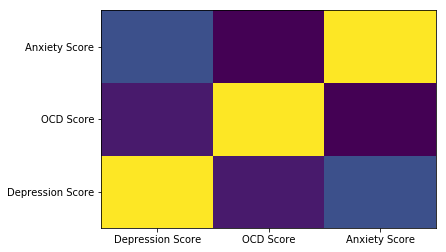

In [171]:
plt.pcolor(df.corr())
plt.yticks(np.arange(0.5, len(df.corr().index), 1), df.corr().index)
plt.xticks(np.arange(0.5, len(df.corr().columns), 1), df.corr().columns)
plt.show()

In [173]:
wordList_anxiety = ['anxiety', 'depression', 'Anxiety:', 'hate', 'anxiety:', 'attack', 
                'mental', 'Anxiety', 'unfollow', 'think', 'crippling', 'health', 
                'stable', 'fall', 'Remedy', 'shut', 'stressed', 'attacks', 'PTSD', 
                'war', 'sleep', 'outside', 'polish', 'shit', 'ruined', 'irrational', 
                'panic', 'opportunities', 'night', 'friends', 'wish', 'help', 'alone', 
                'last', 'fear', 'stress', 'hell', 'trust', 'worst', 'ANXIETY', 'feeling', 
                'start', 'sadness', 'watching', 'scared', 'thought', 'thinking', 
                'suicidal', 'heart', 'Social', 'severe', 'breakdowns', 'mind', 'reason', 
                'fantasies', 'yearning', 'uncontrollable', 'sad', 'anxious', 'phone', 
                'friend', 'crying', 'worse', 'die', 'honestly', 'pretty', 'disorder', 
                'anxiety?', 'suffered', 'depressed', 'suffer', 'tired', 'calm', 'care', 
                'control', 'crazy', 'weird', 'problems', 'separation', 'brain', 'closer', 
                'pulled', 'issues', 'struggle', 'Depression', 'tough', 'mad', 'end', 
                'finals', 'sick', 'sucks', 'nervous', 'waiting', 'god', 'grades', 'eat', 'self', 
                'pain', 'horrible', 'far', 'leaving', 'remember', 'hit', 'HATE', 'worry', 'poor', 
                'Overboard', 'deep', 'body', 'helped', 'walking', 'breath', 'sorry', 'killing', 
                'public', 'tweet', 'class', 'hurt', 'gone', 'learn', 'relationships', 
                'medication', 'wake', 'anxiety', 'terrible', 'stuck', 'sleepy', 'future', 'problem', 
                'empty', 'kill', 'awake', 'experiencing', 'failing', 'inspired', 'miss', 
                'shaking', 'therapy', 'diagnosed', 'tweets', 'stupid', 'breakdown', 'ruining', 
                'ill', 'helpless', 'anxiety!', 'wrong', 'Sorry']
wordList_depression = ['depression', 'anxiety', 'me', 'stress', 'yelled', 'eating', 'food', 'binge', 'junk', 'life','hibernation', 'happy', 'fighting', 'mood', 'Depression', 'ok', 
'ruin', 'isnt', 'seasonal', 'grades', 'love', 'back', 'mental', 'help', 'empty', 'sad', 'failing', 'need', 'feeling', 'hate', 'bad', 'cured', 'thoughts', 'regular', 
'nap', 'something', 'cure', 'crippling', 'friends', 'deal', 'literally', 'mind', 'health', 'suicidal', 'helped', 'things', 'suffering', 'alone', 'bright', 'Me', 'hates', 
'weed', 'kills', 'helps', 'depressed', 'saved', 'tears', 'illness', 'heart', 'thinking', 'pain', 'suffer', 'worse', 'break', 'joke', 'major', 'problems','messy', 
'PTSD', "doesn't", 'DICK', 'die', 'Dont', 'fat', 'kill',  'cope', 'gets', 'anything', 'skin', 'battle', 'through', 'high', 'ppl', 'cry', 'young', 'serious', 'positivity', 
'love"', 'faithful', 'ashamed', 'dark', 'exams', 'naps', 'times', 'smile', 'clinical', 'season', 'cuddle', 'strength', 'room', 'lot', 'music', 'justifiable', 'honestly',
'friend', 'hell','problem', 'weak', 'shameful', 'destroy', 'feelings', 'fear', 'choice', 'winter', 'face', 'social', 'journey', 'breakdowns', 'fight', 'either', 
'motivation', 'work', 'question', 'Quest', 'win', 'severe', 'cause', 'understand', 'future', 'wild', 'stay', 'deep', 'disorder', 'realize', 'time','praying', 'changed', 
'SIN!','swear', 'message', 'suicide','trust', 'Great', 'late', 'healthy','push', 'sleep', 'growth', 'barely', 'outta', 'working', 'shut', 'handle', 'wake', 'youth', 
'person', 'support', 'crying', 'living', 'illnesses', 'teachers', 'depressionbrain', 'brain', 'depression?', 'spread', 'weird', 'act', 'fact', 'gain', 'save', 'Ill', 
'addiction', 'leave', 'together', 'shared', 'hide', 'vacation', 'FightAgainstIt', 'ill', 'SadMoms', 'fightingdepression','crippled', 'Iamdepression',  'listening',
'DEPRESSION', 'control', 'energy', 'irrational', 'letting', 'weather', 'knocked', 'openly', 'strong', 'life!', 'focus', 'favorite', 'struggle','works', 'though', 
'hear', 'college', 'huge', 'heard', 'tripped', 'eyes', 'cures','little', 'send', 'death',  'end', 'deserve', 'probably', 'used', 'therapist', 'depressive', 'lie', 
'sadness', 'deeper', 'tired', 'admit', 'acting']

wordList_OCD = ['anxiety', 'mentalhealth', 'depression', 'ocd', 
'mentalillness', 'love', 'make', 'bipolar', 'clean', 'even', 
'feel', 'house', 'mental', 'makes', 'ptsd', 'good', 'health', 
'cleaning', 'work', 'problems', 'made', 'disorder', 'many', 'little', 'thing', 
'hate', 'book', 'recovery', 
'look', 'find', 'everything', 'making', 'keep', 'awareness', 
'happy', 'better', 'well', 'stop', 'home', 'check', 
'adhd', 'times', 'BPD', 'crazy', 'room', 'autism', 'bad', 'great', 'hands', 'hard', 'wrong', 
'support', 'Mentalhealth', 'treatment', 'therapy', 'Schizophrenia', 'illness',
'MentalHealthAwareness', 'change', 'Bipolar', 'intrusive', 'Depression', 
'symptoms', 'awarenessweek', 'getting', 'morning', 'living', 'ever', 'experience', 'live', 'drive', 
'bpd', 'start', 'hope', 'bed', 'best', 'end', 'already', 'share', 'year', 'set', 'treat', 'another', 
'control', 'psychology', 'article', 'wish', 'took', 'anxious', 'face', 'driving', 'issues', 'feeling', 
'Therapy', 'mess', 'perfect', 'mindfulness', 'wash', 'endthestigma', 'leave', 'place', 
'enough', 'CBT', 'suffer', 'stigma', 'helped', 'perfectionist', 'bothers', 'looks', 'least', 
'stress', 'obsessive', 'weird', 'Autism', 'satisfying', 'fix', 'obsession', 'BiPolar',  
'cleaned', 'problem', 'Obsessive', 'suffering', 'dirty', 'tidy', 'important', 'washing', 
'neat', 'addiction', 'pretty', 'clear', 'amazing', 'Compulsive', 'bathroom', 'severe', 
'closet', 'obsessions', 'socks']

In [175]:
pd.DataFrame(wordList_anxiety,wordList_depression,wordList_OCD,columns=["wordList_anxiety","wordList_depression","wordList_OCD"])

TypeError: __init__() got multiple values for argument 'columns'